### Maricopa Agricultural Center Season 6

### Citation for Input Trait Data

LeBauer, David et al. (2020), Data From: TERRA-REF, An open reference data set from high resolution genomics, phenomics, and imaging sensors, v6, Dryad, Dataset, https://doi.org/10.5061/dryad.4b8gtht99

##### Environmental weather data can be downloaded from the MAC weather station [website](https://cals.arizona.edu/azmet/06.htm)

Please email dlebauer@email.arizona.edu or ejcain@email.arizona.edu with any questions or comments, or create an issue in this [repository](https://github.com/genophenoenvo/terraref-datasets) 

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests

In [2]:
def download_csv(url, folder_name, file_name):
    response = requests.get(url)
    with open(os.path.join(folder_name, file_name), 'wb') as f:
        f.write(response.content)

In [3]:
def read_in_csv(folder_name, file_name):
    df = pd.read_csv(folder_name + '/' + file_name, low_memory=False)
    return df

In [4]:
def plot_hist(df, value_column, trait_column):
    
    trait_name = df[trait_column].unique()[0]
    return df[value_column].hist(color='navy').set_xlabel(trait_name);

In [5]:
def check_for_nulls_duplicates(df):
    
    print(
        f'Sum of null values:\n{df.isnull().sum()}\n-----\n'
        f'Value counts for duplicates:\n{df.duplicated().value_counts()}'
    )

In [6]:
def check_unique_values(df):

    for col in df.columns:
        
        if df[col].nunique() < 5:
            print(f'{df[col].nunique()} unique value(s) for {col} column: {df[col].unique()}')
            
        else:
            print(f'{df[col].nunique()} values for {col} column')

In [7]:
def extract_range_column_values(working_df, plot_column):
    
    new_df = working_df.copy()

    new_df['range'] = new_df[plot_column].str.extract("Range (\d+)").astype(int)
    new_df['column'] = new_df[plot_column].str.extract("Column (\d+)").astype(int)
    
    return new_df

In [8]:
def convert_datetime_column(working_df, date_column):
    
    new_datetimes = pd.to_datetime(working_df[date_column])
    
    new_df_0 = working_df.drop(labels=date_column, axis=1)
    new_df_1 = new_df_0.copy()
    new_df_1['date'] = new_datetimes
    
    return new_df_1

In [9]:
def rename_value_column(working_df, value_column, trait_column):
    
    trait = working_df[trait_column].unique()[0]
    
    new_df_0 = working_df.rename({value_column: trait}, axis=1)
    new_df_1 = new_df_0.drop(labels=trait_column, axis=1)
    
    return new_df_1

In [10]:
def reorder_columns(working_df, new_col_order_list):
    
    working_df_1 = pd.DataFrame(data=working_df, columns=new_col_order_list)
    return working_df_1

In [12]:
def save_to_csv_with_timestamp(df, name_of_dataset):
    
    timestamp = datetime.datetime.now().replace(microsecond=0).isoformat()
    output_filename = ('data/processed/' + f'{name_of_dataset}_' + f'{timestamp}.csv').replace(':', '')

    df.to_csv(output_filename, index=False)

In [13]:
def save_to_csv_without_timestamp(list_of_dfs, list_of_output_filenames):

    for i,j in zip(list_of_dfs, list_of_output_filenames):
        i.to_csv(j, index=False)

#### A. Aboveground Dry Biomass

In [14]:
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [15]:
aboveground_dry_biomass_s6_url = 'https://de.cyverse.org/dl/d/1333BF0F-9462-4F0A-8D35-2B446F0CC989/season_6_aboveground_dry_biomass_manual.csv'
aboveground_dry_biomass_s6_input_filename = 'aboveground_dry_biomass_s6.csv'

In [16]:
download_csv(aboveground_dry_biomass_s6_url, folder_name=folder_name, file_name=aboveground_dry_biomass_s6_input_filename)

In [17]:
adb_0 = read_in_csv(folder_name=folder_name, file_name=aboveground_dry_biomass_s6_input_filename)
# print(adb_0.shape)
# adb_0.head()

(693, 12)


,plot,scientificname,genotype,treatment,date,trait,method,mean,checked,author,season,method_type
0,MAC Field Scanner Season 6 Range 3 Column 9,Sorghum bicolor,PI329440,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,1410,0,"Newcomb, Maria",Season 6,manual
1,MAC Field Scanner Season 6 Range 4 Column 7,Sorghum bicolor,PI570400,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,11800,0,"Newcomb, Maria",Season 6,manual
2,MAC Field Scanner Season 6 Range 4 Column 8,Sorghum bicolor,PI329711,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,12300,0,"Newcomb, Maria",Season 6,manual
3,MAC Field Scanner Season 6 Range 4 Column 11,Sorghum bicolor,PI521152,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,12200,0,"Newcomb, Maria",Season 6,manual
4,MAC Field Scanner Season 6 Range 5 Column 7,Sorghum bicolor,PI569264,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,14000,0,"Newcomb, Maria",Season 6,manual


Text(0.5, 0, 'aboveground_dry_biomass')

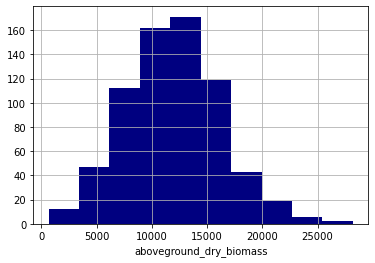

In [18]:
# plot_hist(adb_0, 'mean', 'trait')

In [19]:
# check_for_nulls_duplicates(adb_0)

Sum of null values:
plot              0
scientificname    0
genotype          0
treatment         0
date              0
trait             0
method            0
mean              0
checked           0
author            0
season            0
method_type       0
dtype: int64
-----
Value counts for duplicates:
False    693
dtype: int64


In [20]:
adb_1 = extract_range_column_values(adb_0, 'plot')
# print(adb_1.shape)
# adb_1.sample(n=3)

#### Add Blocking Heights

In [21]:
bh_s6_url = 'https://de.cyverse.org/dl/d/73900334-1A0F-4C56-8F96-FAC303671431/s6_blocks.csv.txt'
bh_s6_input_filename = 'blocking_heights_s6.csv'

In [22]:
download_csv(bh_s6_url, folder_name=folder_name, file_name=bh_s6_input_filename)

In [25]:
bh_df = read_in_csv(folder_name=folder_name, file_name=bh_s6_input_filename)
print(bh_df.shape)
bh_df.head()

(999, 2)


,height_block,plot
0,border,MAC Field Scanner Season 6 Range 2 Column 2
1,border,MAC Field Scanner Season 6 Range 2 Column 3
2,border,MAC Field Scanner Season 6 Range 2 Column 4
3,border,MAC Field Scanner Season 6 Range 2 Column 5
4,border,MAC Field Scanner Season 6 Range 2 Column 6


In [26]:
# bh_df.height_block.value_counts()

tall      542
short     130
border     42
Name: height_block, dtype: int64

In [27]:
# check_for_nulls_duplicates(bh_df)

Sum of null values:
height_block    285
plot            285
dtype: int64
-----
Value counts for duplicates:
False    715
True     284
dtype: int64


In [28]:
bh_df_1 = bh_df.dropna(axis=0, how='all')
# bh_df_1.shape

(714, 2)

#### Merge blocking heights with aboveground dry biomass dataframe

In [31]:
adb_2 = adb_1.merge(bh_df_1, how='left', left_on='plot', right_on='plot')
# print(adb_2.shape)
# adb_2.head(3)

(693, 15)


,plot,scientificname,genotype,treatment,date,trait,method,mean,checked,author,season,method_type,range,column,height_block
0,MAC Field Scanner Season 6 Range 3 Column 9,Sorghum bicolor,PI329440,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,1410,0,"Newcomb, Maria",Season 6,manual,3,9,border
1,MAC Field Scanner Season 6 Range 4 Column 7,Sorghum bicolor,PI570400,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,11800,0,"Newcomb, Maria",Season 6,manual,4,7,tall
2,MAC Field Scanner Season 6 Range 4 Column 8,Sorghum bicolor,PI329711,MAC Season 6: Sorghum,2018-07-31,aboveground_dry_biomass,Whole above ground biomass at harvest,12300,0,"Newcomb, Maria",Season 6,manual,4,8,tall


In [34]:
adb_3 = convert_datetime_column(adb_2, 'date')
# print(adb_3.shape)
# adb_3.head(3)

(693, 15)


In [35]:
adb_4 = rename_value_column(adb_3, 'mean', 'trait')
# print(adb_4.shape)
# adb_4.tail(3)

In [36]:
cols_to_drop = ['checked', 'author', 'season', 'treatment']

adb_5 = adb_4.drop(labels=cols_to_drop, axis=1)
# print(adb_5.shape)
# adb_5.head(3)

##### Add units (kg/ha) column to aboveground dry biomass dataset

In [37]:
adb_6 = adb_5.copy()
adb_6['units'] = 'kg/ha'

# print(adb_6.shape)
# adb_6.tail(3)

In [38]:
new_col_order = ['date', 'plot', 'range', 'column', 'scientificname', 'genotype', 'height_block', 'method', 
                 'aboveground_dry_biomass', 'units', 'method_type']

adb_7 = reorder_columns(adb_6, new_col_order)
# print(adb_7.shape)
# adb_7.head(3)

(693, 11)


,date,plot,range,column,scientificname,genotype,height_block,method,aboveground_dry_biomass,units,method_type
0,2018-07-31,MAC Field Scanner Season 6 Range 3 Column 9,3,9,Sorghum bicolor,PI329440,border,Whole above ground biomass at harvest,1410,kg/ha,manual
1,2018-07-31,MAC Field Scanner Season 6 Range 4 Column 7,4,7,Sorghum bicolor,PI570400,tall,Whole above ground biomass at harvest,11800,kg/ha,manual
2,2018-07-31,MAC Field Scanner Season 6 Range 4 Column 8,4,8,Sorghum bicolor,PI329711,tall,Whole above ground biomass at harvest,12300,kg/ha,manual


#### B. Canopy Height - Sensor

In [43]:
canopy_height_s6_url = 'https://de.cyverse.org/dl/d/D069737A-76F3-4B69-A213-4B8811A357C0/season_6_canopy_height_sensor.csv'
canopy_height_s6_input_filename = 'canopy_height_s6.csv'

In [44]:
download_csv(canopy_height_s6_url, folder_name=folder_name, file_name=canopy_height_s6_input_filename)

In [45]:
ch_0 = read_in_csv(folder_name=folder_name, file_name=canopy_height_s6_input_filename)
# print(ch_0.shape)
# ch_0.head()

(51463, 12)


,plot,scientificname,genotype,treatment,date,trait,method,mean,checked,author,season,method_type
0,MAC Field Scanner Season 6 Range 53 Column 10,Sorghum bicolor,PI329440,MAC Season 6: Sorghum,2018-05-28,canopy_height,Scanner 3d ply data to height,85,0,"Zongyang, Li",Season 6,sensor
1,MAC Field Scanner Season 6 Range 53 Column 13,Sorghum bicolor,SP1516,MAC Season 6: Sorghum,2018-05-28,canopy_height,Scanner 3d ply data to height,96,0,"Zongyang, Li",Season 6,sensor
2,MAC Field Scanner Season 6 Range 53 Column 12,Sorghum bicolor,SP1516,MAC Season 6: Sorghum,2018-05-28,canopy_height,Scanner 3d ply data to height,97,0,"Zongyang, Li",Season 6,sensor
3,MAC Field Scanner Season 6 Range 53 Column 9,Sorghum bicolor,SP1516,MAC Season 6: Sorghum,2018-05-28,canopy_height,Scanner 3d ply data to height,95,0,"Zongyang, Li",Season 6,sensor
4,MAC Field Scanner Season 6 Range 53 Column 5,Sorghum bicolor,SP1516,MAC Season 6: Sorghum,2018-05-28,canopy_height,Scanner 3d ply data to height,98,0,"Zongyang, Li",Season 6,sensor


In [46]:
# check_for_nulls_duplicates(ch_0)

Sum of null values:
plot              0
scientificname    0
genotype          0
treatment         0
date              0
trait             0
method            0
mean              0
checked           0
author            0
season            0
method_type       0
dtype: int64
-----
Value counts for duplicates:
False    48088
True      3375
dtype: int64


#### Drop duplicates

In [48]:
ch_1 = ch_0.drop_duplicates(ignore_index=True)
# print(ch_1.shape)
# check_for_nulls_duplicates(ch_1)

(48088, 12)
Sum of null values:
plot              0
scientificname    0
genotype          0
treatment         0
date              0
trait             0
method            0
mean              0
checked           0
author            0
season            0
method_type       0
dtype: int64
-----
Value counts for duplicates:
False    48088
dtype: int64


In [49]:
ch_2 = extract_range_column_values(ch_1, 'plot')
# print(ch_2.shape)
# ch_2.sample(n=3)

In [50]:
ch_3 = convert_datetime_column(ch_2, 'date')
# print(ch_3.shape)
# ch_3.dtypes

In [51]:
ch_4 = rename_value_column(ch_3, 'mean', 'trait')
# print(ch_4.shape)
# ch_4.tail(3)

In [52]:
# add units (cm) to column name

ch_5 = ch_4.rename({'canopy_height': 'canopy_height_cm'}, axis=1)
# ch_5.sample(n=3)

#### Add blocking heights

In [53]:
bh_df_1.head(3)

,height_block,plot
0,border,MAC Field Scanner Season 6 Range 2 Column 2
1,border,MAC Field Scanner Season 6 Range 2 Column 3
2,border,MAC Field Scanner Season 6 Range 2 Column 4


In [56]:
print(bh_df_1['plot'].nunique())
print(ch_0['plot'].nunique())

714
809


There is not a height block provided for every plot, so the final canopy height dataframe will contain some nulls.

In [58]:
ch_6 = ch_5.merge(bh_df_1, how='left', left_on='plot', right_on='plot')
# print(ch_6.shape)
# ch_6.tail(3)

(48088, 14)


,plot,scientificname,genotype,treatment,method,canopy_height_cm,checked,author,season,method_type,range,column,date,height_block
48085,MAC Field Scanner Season 6 Range 30 Column 15,Sorghum bicolor,PI641830,MAC Season 6: Sorghum,3D scanner to 98th quantile height,239,0,"Zongyang, Li",Season 6,sensor,30,15,2018-07-25,short
48086,MAC Field Scanner Season 6 Range 30 Column 15,Sorghum bicolor,PI641830,MAC Season 6: Sorghum,3D scanner to 98th quantile height,238,0,"Zongyang, Li",Season 6,sensor,30,15,2018-07-27,short
48087,MAC Field Scanner Season 6 Range 30 Column 15,Sorghum bicolor,PI641830,MAC Season 6: Sorghum,3D scanner to 98th quantile height,239,0,"Zongyang, Li",Season 6,sensor,30,15,2018-07-30,short


In [59]:
ch_7 = ch_6.drop(labels=['checked', 'author', 'season', 'treatment'], axis=1)
# print(ch_7.shape)
# ch_7.tail(3)

In [60]:
# ch_7.isnull().sum()

plot                   0
scientificname         0
genotype               0
method                 0
canopy_height_cm       0
method_type            0
range                  0
column                 0
date                   0
height_block        1400
dtype: int64

In [61]:
new_col_order = ['date', 'plot', 'range', 'column', 'scientificname', 'genotype', 'method', 'canopy_height_cm', 
                 'height_block', 'method_type']

ch_8 = reorder_columns(ch_7, new_col_order)
# print(ch_8.shape)
# ch_8.head(3)

(48088, 10)


,date,plot,range,column,scientificname,genotype,method,canopy_height_cm,height_block,method_type
0,2018-05-28,MAC Field Scanner Season 6 Range 53 Column 10,53,10,Sorghum bicolor,PI329440,Scanner 3d ply data to height,85,NaN,sensor
1,2018-05-28,MAC Field Scanner Season 6 Range 53 Column 13,53,13,Sorghum bicolor,SP1516,Scanner 3d ply data to height,96,NaN,sensor
2,2018-05-28,MAC Field Scanner Season 6 Range 53 Column 12,53,12,Sorghum bicolor,SP1516,Scanner 3d ply data to height,97,NaN,sensor


#### IV. Write derived data to csv files

In [ ]:
list_of_dfs = [adb_7, ch_8]
list_of_file_output_names = ['mac_season_6_aboveground_dry_biomass.csv',
                            'mac_season_6_canopy_height_sensor.csv']

save_to_csv_without_timestamp(list_of_dfs, list_of_file_output_names)